In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp22-cx-kaggle-competition/sample_submission.csv
/kaggle/input/sp22-cx-kaggle-competition/train.csv
/kaggle/input/sp22-cx-kaggle-competition/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/sp22-cx-kaggle-competition/train.csv')
test = pd.read_csv('/kaggle/input/sp22-cx-kaggle-competition/test.csv')

In [3]:
train.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,0,3/28/2021 15:48:22,Ernst and Young,Senior Consultant,Management Consultant,135000,"Atlanta, GA",2.0,0.0,Data & Analytics Consulting,...,0,0,0,0,0,0,0,1,Hispanic,Master's Degree
1,1,4/3/2021 18:41:29,Deloitte,Senior Manager,Management Consultant,216000,"Baltimore, MD",15.0,4.0,General,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2,2/2/2021 13:05:18,Amazon,L4,Software Engineer,192000,"New York, NY",2.0,0.0,API Development (Back-End),...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
3,3,7/19/2021 1:37:17,Oracle,IC-2,Software Engineer,235000,"Redwood City, CA",1.0,1.0,Distributed Systems (Back-End),...,0,0,0,1,0,0,0,0,Asian,Master's Degree
4,4,3/29/2021 21:27:36,Wayfair,L3,Software Engineer,177000,"Boston, MA",9.0,0.0,API Development (Back-End),...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree


In [4]:
test.head()

,Unnamed: 0,timestamp,company,level,title,location,yearsofexperience,yearsatcompany,tag,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,0,9/15/2019 1:34:10,Uber,L4,Software Engineer,"Amsterdam, NH, Netherlands",4.0,0.0,Full Stack,6000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,12/28/2020 18:56:43,CrowdStrike,Senior Software Engineer,Software Engineer,"Chicago, IL",10.0,1.0,Distributed Systems (Back-End),74000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2,3/4/2019 2:57:57,Amazon,L5,Solution Architect,"Sydney, NS, Australia",10.0,5.0,DevOps,40000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,3,4/9/2021 11:38:55,Deutsche Bank,Analyst,Software Engineer,"Cary, NC",2.0,2.0,Full Stack,0.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
4,4,1/20/2020 1:21:37,Cisco,Grade 8,Software Engineer,"San Jose, CA",5.0,1.0,Networking,15000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree


In [5]:
train_test = pd.concat([train, test], axis=0)
train_test.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,0,3/28/2021 15:48:22,Ernst and Young,Senior Consultant,Management Consultant,135000.0,"Atlanta, GA",2.0,0.0,Data & Analytics Consulting,...,0,0,0,0,0,0,0,1,Hispanic,Master's Degree
1,1,4/3/2021 18:41:29,Deloitte,Senior Manager,Management Consultant,216000.0,"Baltimore, MD",15.0,4.0,General,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2,2/2/2021 13:05:18,Amazon,L4,Software Engineer,192000.0,"New York, NY",2.0,0.0,API Development (Back-End),...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
3,3,7/19/2021 1:37:17,Oracle,IC-2,Software Engineer,235000.0,"Redwood City, CA",1.0,1.0,Distributed Systems (Back-End),...,0,0,0,1,0,0,0,0,Asian,Master's Degree
4,4,3/29/2021 21:27:36,Wayfair,L3,Software Engineer,177000.0,"Boston, MA",9.0,0.0,API Development (Back-End),...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree


In [6]:
train_test.describe()

,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,stockgrantvalue,bonus,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,62642.000000,5.011300e+04,62642.000000,62642.000000,6.264200e+04,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,21297.420006,2.161279e+05,7.204135,2.702093,5.148608e+04,19334.746588,9856.201989,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,15051.350908,1.393194e+05,5.840375,3.263656,8.187457e+04,26781.292040,6679.104563,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,0.000000,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7830.000000,1.350000e+05,3.000000,0.000000,0.000000e+00,1000.000000,7369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18791.500000,1.880000e+05,6.000000,2.000000,2.500000e+04,14000.000000,7839.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34451.750000,2.620000e+05,10.000000,4.000000,6.500000e+04,26000.000000,11521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50112.000000,4.980000e+06,69.000000,69.000000,2.800000e+06,1000000.000000,47926.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **EDA**

<AxesSubplot:xlabel='yearsatcompany', ylabel='Count'>

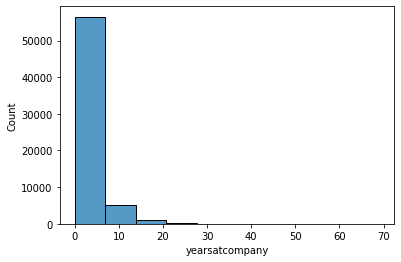

In [7]:
sns.histplot(train_test['yearsatcompany'], bins = 10)

<AxesSubplot:xlabel='Education', ylabel='Count'>

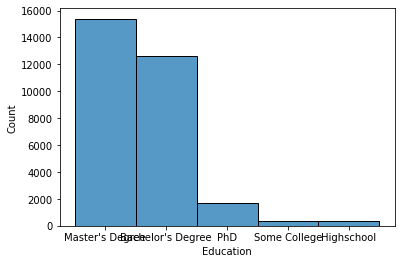

In [8]:
sns.histplot(train_test['Education'])

<AxesSubplot:xlabel='yearsofexperience', ylabel='Count'>

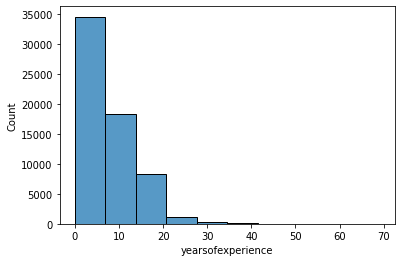

In [9]:
sns.histplot(train_test['yearsofexperience'], bins = 10)

<AxesSubplot:xlabel='stockgrantvalue', ylabel='Count'>

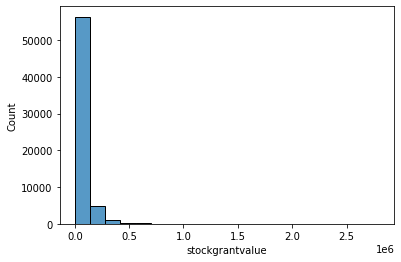

In [10]:
sns.histplot(train_test['stockgrantvalue'], bins = 20)

<AxesSubplot:xlabel='bonus', ylabel='Count'>

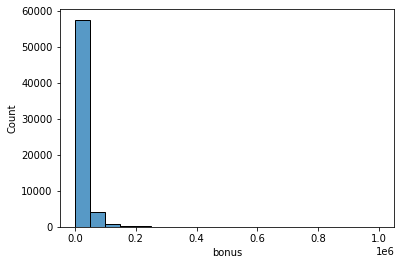

In [11]:
sns.histplot(train_test['bonus'], bins = 20)

In [12]:
r_1 = np.corrcoef(train_test['yearsatcompany'], train_test['bonus'])
print(f'The value of the correlation coefficient was: {r_1[0, 1]}')

The value of the correlation coefficient was: 0.10812235486112212


In [13]:
r_2 = np.corrcoef(train_test['yearsatcompany'], train_test['stockgrantvalue'])
print(f'The value of the correlation coefficient was: {r_2[0, 1]}')

The value of the correlation coefficient was: 0.08949233055576694


In [14]:
train_test['location'].value_counts().iloc[0:10]

Seattle, WA          8701
San Francisco, CA    6797
New York, NY         4562
Redmond, WA          2649
Mountain View, CA    2275
Sunnyvale, CA        2248
San Jose, CA         2047
Austin, TX           1527
Menlo Park, CA       1440
Cupertino, CA        1431
Name: location, dtype: int64

In [15]:
train_test.groupby('location').agg(np.mean)

,Unnamed: 0,totalyearlycompensation,yearsofexperience,yearsatcompany,stockgrantvalue,bonus,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
location,,,,,,,,,,,,,,,,,
"Aachen, NW, Germany",18808.333333,111500.000000,4.00000,0.333333,8000.000000,12333.333333,3645.0,0.333333,0.000000,0.000000,0.0,0.000000,0.333333,0.00000,0.000000,0.0,0.000000
"Aarhus, AR, Denmark",21154.200000,263400.000000,4.80000,2.400000,86200.000000,30400.000000,12962.0,0.000000,0.200000,0.200000,0.0,0.000000,0.000000,0.40000,0.000000,0.0,0.000000
"Aberdeen Proving Ground, MD",30088.000000,79000.000000,2.00000,2.000000,5000.000000,0.000000,19060.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
"Abingdon, MD",5857.000000,173000.000000,8.00000,4.000000,40000.000000,0.000000,14910.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.0,0.000000
"Accra, AA, Ghana",8951.000000,NaN,5.00000,2.000000,0.000000,0.000000,3949.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zapopan, JA, Mexico",43867.000000,25000.000000,2.00000,1.000000,0.000000,0.000000,4526.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,1.000000
"Zaragoza, AR, Spain",10983.666667,41000.000000,6.00000,1.666667,0.000000,3333.333333,14135.0,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.333333,0.0,0.000000
"Zug, ZG, Switzerland",12384.000000,NaN,15.00000,5.000000,0.000000,10000.000000,13688.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000


In [16]:
r_3 = np.corrcoef(train_test['location'].value_counts().iloc[0:], train_test.groupby('location').agg(np.mean)["Race_Asian"])
print(f'The value of the correlation coefficient was: {r_3[0, 1]}')

The value of the correlation coefficient was: -0.007693338823392757


In [17]:
r_4 = np.corrcoef(train_test['location'].value_counts().iloc[0:], train_test.groupby('location').agg(np.mean)["Race_White"])
print(f'The value of the correlation coefficient was: {r_4[0, 1]}')

The value of the correlation coefficient was: -0.025516808412722795


In [18]:
r_5 = np.corrcoef(train_test['location'].value_counts().iloc[0:], train_test.groupby('location').agg(np.mean)["Race_Black"])
print(f'The value of the correlation coefficient was: {r_5[0, 1]}')

The value of the correlation coefficient was: 0.04018608962578599


In [19]:
r_5 = np.corrcoef(train_test['location'].value_counts().iloc[0:], train_test.groupby('location').agg(np.mean)["Race_Hispanic"])
print(f'The value of the correlation coefficient was: {r_5[0, 1]}')

The value of the correlation coefficient was: -0.016021939534805924


<BarContainer object of 1050 artists>

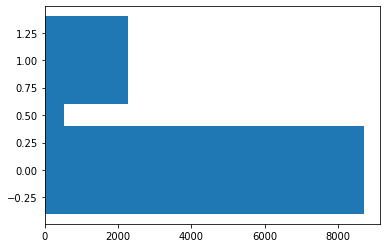

In [20]:
plt.barh(train_test.groupby('location').agg(np.mean)["Race_Black"], train_test['location'].value_counts().iloc[0:])

<AxesSubplot:xlabel='totalyearlycompensation', ylabel='Count'>

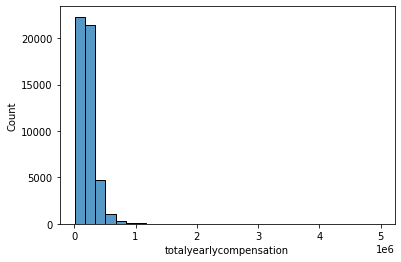

In [21]:
sns.histplot(train_test['totalyearlycompensation'], bins = 30)

In [22]:
train['year'] = pd.DatetimeIndex(train['timestamp']).year

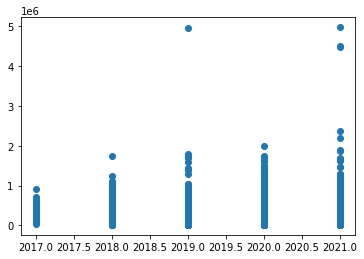

In [23]:
plt.scatter(train['year'], train['totalyearlycompensation']);

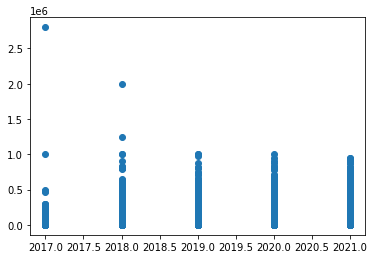

In [24]:
plt.scatter(train['year'], train['stockgrantvalue']);

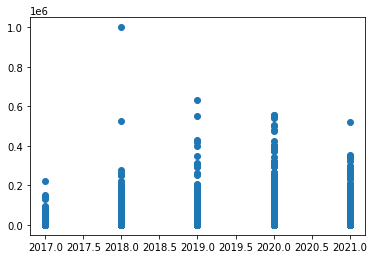

In [25]:
plt.scatter(train['year'], train['bonus']);

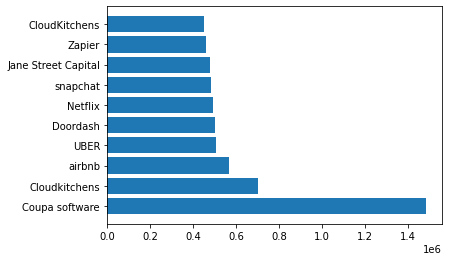

In [26]:
top_position_salary = train_test.groupby('company').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation', ascending=False).iloc[0:10, :]
plt.barh(top_position_salary['company'], top_position_salary['totalyearlycompensation']); 

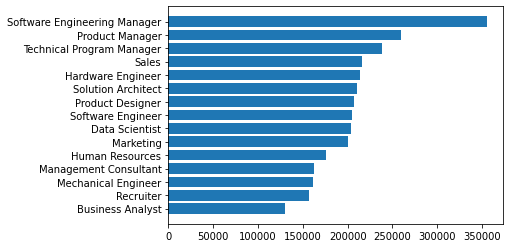

In [27]:
title_comp = train_test.groupby('title').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation')
plt.barh(title_comp['title'], title_comp['totalyearlycompensation']); 

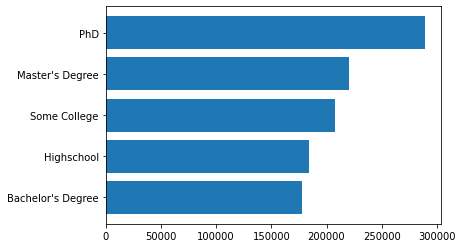

In [28]:
education_salary = train_test.groupby('Education').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation')
plt.barh(education_salary['Education'], education_salary['totalyearlycompensation']); 

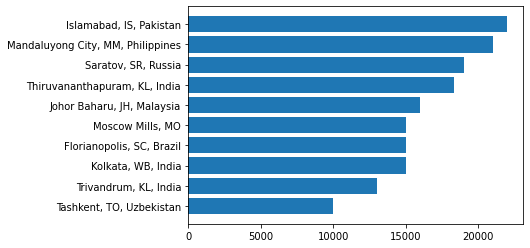

In [29]:
bot_location_salary = train.groupby('location').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation').iloc[0:10, :]
plt.barh(bot_location_salary['location'], bot_location_salary['totalyearlycompensation']); 

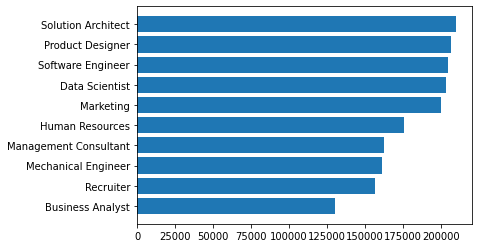

In [30]:
bot_title_salary = train_test.groupby('title').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation').iloc[0:10, :]
plt.barh(bot_title_salary['title'], bot_title_salary['totalyearlycompensation']); 

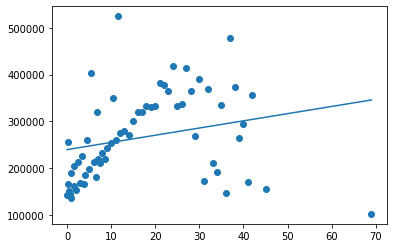

In [31]:
yoe_salary = train[['yearsofexperience', 'totalyearlycompensation']]
yoe_salary_means = yoe_salary.groupby('yearsofexperience').mean().reset_index()
m, b = np.polyfit(yoe_salary_means['yearsofexperience'], yoe_salary_means['totalyearlycompensation'], 1) 
plt.scatter(yoe_salary_means['yearsofexperience'], yoe_salary_means['totalyearlycompensation'])
plt.plot(yoe_salary_means['yearsofexperience'], m * yoe_salary_means['yearsofexperience'] + b);

# **Modelling**

In [32]:
X_train = train.drop(labels=['totalyearlycompensation'], axis=1)
y_train = train.loc[:, 'totalyearlycompensation']

X_train = X_train.select_dtypes(include=['float64', 'int64']).drop(["year"], axis = 1)
X_train

,Unnamed: 0,yearsofexperience,yearsatcompany,stockgrantvalue,bonus,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,0,2.0,0.0,0.0,20000.0,7839,1,0,0,0,0,0,0,0,0,1
1,1,15.0,4.0,0.0,23000.0,8909,0,0,0,0,0,0,0,0,0,0
2,2,2.0,0.0,29000.0,23000.0,10182,0,1,0,0,0,0,1,0,0,0
3,3,1.0,1.0,65000.0,30000.0,7392,1,0,0,0,0,1,0,0,0,0
4,4,9.0,0.0,12000.0,15000.0,8816,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50108,50108,12.0,1.0,10000.0,0.0,7419,0,0,0,0,0,0,0,0,0,0
50109,50109,10.0,0.0,39000.0,29000.0,40303,0,0,0,0,0,0,0,0,0,0
50110,50110,6.0,0.0,91000.0,28000.0,7419,0,0,0,0,0,0,0,0,0,0
50111,50111,2.0,2.0,75000.0,0.0,7351,0,0,0,0,0,0,0,0,0,0


In [33]:
train_test

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,0,3/28/2021 15:48:22,Ernst and Young,Senior Consultant,Management Consultant,135000.0,"Atlanta, GA",2.0,0.0,Data & Analytics Consulting,...,0,0,0,0,0,0,0,1,Hispanic,Master's Degree
1,1,4/3/2021 18:41:29,Deloitte,Senior Manager,Management Consultant,216000.0,"Baltimore, MD",15.0,4.0,General,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2,2/2/2021 13:05:18,Amazon,L4,Software Engineer,192000.0,"New York, NY",2.0,0.0,API Development (Back-End),...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
3,3,7/19/2021 1:37:17,Oracle,IC-2,Software Engineer,235000.0,"Redwood City, CA",1.0,1.0,Distributed Systems (Back-End),...,0,0,0,1,0,0,0,0,Asian,Master's Degree
4,4,3/29/2021 21:27:36,Wayfair,L3,Software Engineer,177000.0,"Boston, MA",9.0,0.0,API Development (Back-End),...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12524,12524,11/19/2020 11:05:52,Apple,ICT4,Software Engineer,NaN,"Sunnyvale, CA",8.0,3.0,Security,...,0,0,0,0,0,0,0,0,NaN,NaN
12525,12525,8/15/2021 10:39:36,Amazon,L7,Product Manager,NaN,"Seattle, WA",17.0,10.0,Operations,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
12526,12526,6/17/2021 15:50:48,AMD,Senior MTS,Hardware Engineer,NaN,"Santa Clara, CA",11.0,0.0,ASIC Design,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
12527,12527,12/16/2020 11:53:22,Google,5,Solution Architect,NaN,"Norfolk, VA",10.0,1.0,Cloud,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.abs(y_true - y_pred)**2))

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr_train_pred = lr.predict(X_train)

rmse(y_train, lr_train_pred)

74636.16915587765

In [38]:
lr_val_pred = lr.predict(X_val)

rmse(y_val, lr_val_pred)

78327.83402940318

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
rf_train_pred = rf.predict(X_train)
rmse(y_train, rf_train_pred)

22791.835948765656

In [41]:
rf_val_pred = rf.predict(X_val)
rmse(y_val, rf_val_pred)

56078.14715329259

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

lambda_ridge = 0.2

ridge_model = Ridge(alpha=lambda_ridge, fit_intercept=False)
ridge_model.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_val)
ridge_loss = mean_squared_error(y_val, ridge_prediction)
ridge_r2 = r2_score(y_val, ridge_prediction)

print("Root Mean Squared Error of Ridge Model: {:.2f}".format(ridge_loss))
print("R2 of Ridge Model: {:.2f}".format(ridge_r2))

Root Mean Squared Error of Ridge Model: 7974866637.21
R2 of Ridge Model: 0.59


In [43]:
X_test = test.select_dtypes(include=['float64', 'int64'])
X_test

,Unnamed: 0,yearsofexperience,yearsatcompany,stockgrantvalue,bonus,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,0,4.0,0.0,6000.0,15000.0,6580,0,0,0,0,0,0,0,0,0,0
1,1,10.0,1.0,74000.0,16000.0,8198,0,0,0,0,0,0,0,0,0,0
2,2,10.0,5.0,40000.0,0.0,1311,0,0,0,0,0,0,0,0,0,0
3,3,2.0,2.0,0.0,1000.0,9592,0,1,0,0,0,1,0,0,0,0
4,4,5.0,1.0,15000.0,15000.0,7422,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12524,12524,8.0,3.0,165000.0,0.0,7472,0,0,0,0,0,0,0,0,0,0
12525,12525,17.0,10.0,320000.0,0.0,11527,1,0,0,0,0,1,0,0,0,0
12526,12526,11.0,0.0,30000.0,30000.0,7434,1,0,0,0,0,1,0,0,0,0
12527,12527,10.0,1.0,75000.0,30000.0,11420,0,1,0,0,0,0,1,0,0,0


In [44]:
y_test_pred = rf.predict(X_test)    # Choose best model to predict using
y_test_pred

array([106850., 260010., 153710., ..., 242930., 300370., 201260.])

In [45]:
from datetime import datetime

def results_to_csv(data, y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'totalyearlycompensation': y_test})
    df.to_csv('submission.csv',
              index_label='key')

In [46]:
results_to_csv("salary", y_test_pred)